In [33]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scholarNetwork import scholarNetwork as sn
print(sn.__file__)
print(sn.__version__)

scholarNetwork/scholarNetwork.py
$version = 1.2.2.0$


# 构建网络

In [7]:
G = nx.DiGraph()
G.add_weighted_edges_from([(1,2,50),(1,3,30), (3, 2, 10), (2, 4, 20), (2, 5, 30), (5, 3, 5), (4, 5, 10)])

# 流平衡&计算流距离

In [8]:
Gb=sn.flowBalancing(G)
sn.flowDistanceFromSource(Gb)

{1: 1.0,
 2: 2.223639455782313,
 3: 2.352324263038549,
 4: 3.2236394557823136,
 5: 3.4736394557823136,
 'sink': 3.935728458049887}

# 绘制网络

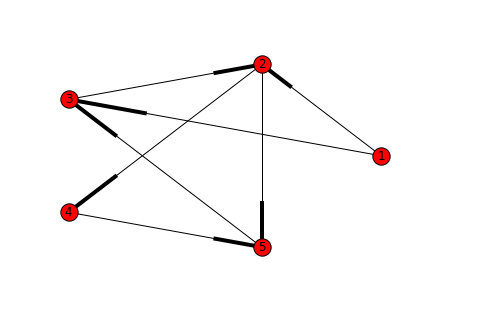

In [26]:
pos=nx.shell_layout(G)   #G is my graph
nx.draw(G, pos = pos, with_labels = True)

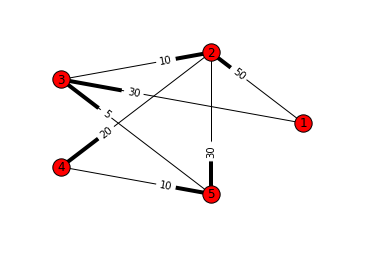

In [27]:
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,label_pos=0.3)
plt.axis('off')
plt.show()

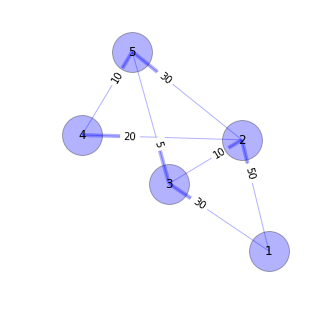

In [17]:
fig = plt.figure(figsize=(5, 5),facecolor='white')
edge_labels = nx.get_edge_attributes(G, 'weight')
sn.draw_graph(edge_labels.keys(), graph_layout='spring', labels = edge_labels.values())

# 可视化流距离

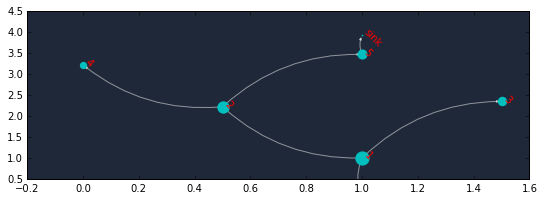

In [21]:
fig = plt.figure(figsize=(9, 3),facecolor='white')
ax = fig.add_subplot(111)
scholarNetwork.plotTree(Gb,ax)
plt.show()

# 检查源代码

In [28]:
dir(sn)

['BeautifulSoup',
 'Counter',
 'DrawTree',
 'Tree',
 'WebtoTree',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__version__',
 'ancestor',
 'angleCo',
 'apportion',
 'buchheim',
 'circle',
 'cm',
 'curve_fit',
 'defaultdict',
 'depth',
 'draw_graph',
 'drawconn',
 'drawt',
 'dt',
 'execute_shifts',
 'firstwalk',
 'flowBalancing',
 'flowDistanceFromSource',
 'flushPrint',
 'generateTree',
 'getGraph',
 'listdir',
 'move_subtree',
 'np',
 'nx',
 'plotTree',
 'plt',
 'random',
 're',
 'second_walk',
 'sm',
 'sys',
 'third_walk',
 'urllib2',
 'width']

In [23]:
sn.drawt

<function scholarNetwork.scholarNetwork.drawt>

In [24]:
import inspect
inspect.getsourcelines(sn.drawt)

(['def drawt(ax,root,rawVersion,circle,J,U,max_x,max_y):\n',
  '    x=root.x\n',
  '    if rawVersion==True:\n',
  '        y=root.y\n',
  '    else:\n',
  '        y=J[str(root.tree)]\n',
  '    if circle == True:\n',
  '        x,y=angleCo(x,y,max_x,max_y)\n',
  "    if str(root.tree)!='source':\n",
  "        ax.scatter(x, y, facecolor='c',lw = 0,alpha=1,\n",
  '                    s=200*U[str(root.tree)]/max(U.values())+3,zorder=2)\n',
  "        ax.text(x, y, root.tree, color = 'red', fontsize = 10, rotation = -45)\n",
  '    for child in root.children:\n',
  '        drawt(ax,child,rawVersion,circle,J,U,max_x,max_y) ###MARK###\n'],
 368)

In [25]:
inspect.getsourcefile(sn.drawt)

'scholarNetwork/scholarNetwork.py'